# Normality tests for screen and frame image data

In [1]:
import cv2 as cv
from numpy import histogram
import matplotlib.pyplot as plt
from tqdm import tqdm
from video699.video.annotated import get_videos, AnnotatedSampledVideoScreenDetector

VIDEOS = get_videos().values()
PAGE_WIDTH = 720 / 2
PAGE_HEIGHT = 576 / 2
HISTOGRAM_MARGINS = 5

## Frame image data histogram

videos: 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]


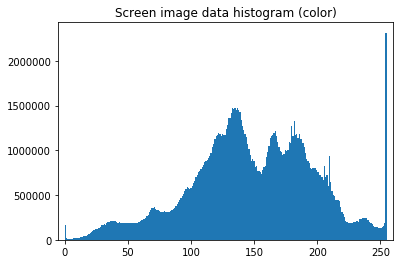

In [2]:
screen_detector = AnnotatedSampledVideoScreenDetector()
screen_image_pixels = [
    pixel
    for video in tqdm(VIDEOS, desc="videos")
    for frame in video
    for screen in screen_detector.detect(frame)
    for pixel in screen.image[:,:,:3].ravel()
]

plt.hist(screen_image_pixels, bins=256)
plt.title("Screen image data histogram (color)")
plt.xlim(-HISTOGRAM_MARGINS, 255 + HISTOGRAM_MARGINS)
plt.savefig("figures/screen-image-color.pdf")
plt.show()

del screen_image_pixels

videos: 100%|██████████| 17/17 [00:00<00:00, 29.09it/s]


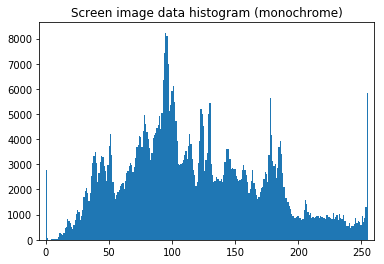

In [3]:
screen_image_pixels = [
    pixel
    for video in tqdm(VIDEOS, desc="videos")
    for frame in video
    for screen in screen_detector.detect(frame)
    for pixel in cv.cvtColor(
        screen.image[:3],
        cv.COLOR_RGB2GRAY,
    ).ravel()
]

plt.hist(screen_image_pixels, bins=256)
plt.title("Screen image data histogram (monochrome)")
plt.xlim(-HISTOGRAM_MARGINS, 255 + HISTOGRAM_MARGINS)
plt.savefig("figures/screen-image-monochrome.pdf")
plt.show()

del screen_image_pixels

## Screen image data histogram

videos: 100%|██████████| 17/17 [03:07<00:00,  7.49s/it]


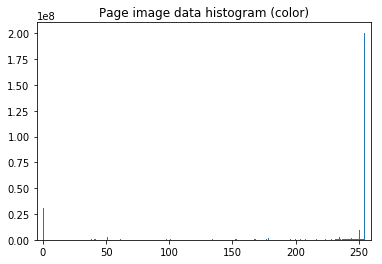

In [4]:
page_image_pixels = [
    pixel
    for video in tqdm(VIDEOS, desc="videos")
    for document in video.documents.values()
    for page in document
    for pixel in page.image(PAGE_WIDTH, PAGE_HEIGHT)[:,:,:3].ravel()
]

plt.hist(page_image_pixels, bins=256)
plt.title("Page image data histogram (color)")
plt.xlim(-HISTOGRAM_MARGINS, 255 + HISTOGRAM_MARGINS)
plt.savefig("figures/page-image-color.pdf")
plt.show()

del page_image_pixels

videos: 100%|██████████| 17/17 [00:05<00:00,  3.02it/s]


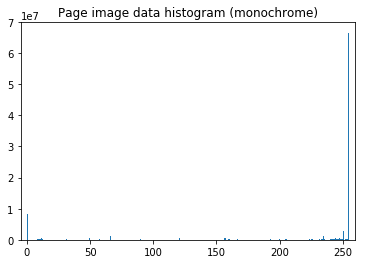

In [5]:
page_image_pixels = [
    pixel
    for video in tqdm(VIDEOS, desc="videos")
    for document in video.documents.values()
    for page in document
    for pixel in cv.cvtColor(
        page.image(PAGE_WIDTH, PAGE_HEIGHT)[:,:,:3],
        cv.COLOR_RGB2GRAY,
    ).ravel()
]

plt.hist(page_image_pixels, bins=256)
plt.title("Page image data histogram (monochrome)")
plt.xlim(-HISTOGRAM_MARGINS, 255 + HISTOGRAM_MARGINS)
plt.savefig("figures/page-image-monochrome.pdf")
plt.show()

del page_image_pixels